# Lecture 11 Exercise

**(a)** This code is supposed to test the accuracy of the SVD in the presence of rounding errors, but
it does not take into account the type of uniqueness we expect from the SVD.  Fix it, then generate the scatter plots below.

In [1]:
import Pkg; Pkg.add("Plots");

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Desktop/个人/CSE 6643 Numerical Linear Algebra/Lecture/Project.toml`
  No Changes to `~/Desktop/个人/CSE 6643 Numerical Linear Algebra/Lecture/Manifest.toml`


In [2]:
using LinearAlgebra, Plots; default(label=false, size=(900,550))

In [3]:
function svd_accuracy_test(m, pow=1)
    U = qr(randn(m,m)).Q # random unitary U
    V = qr(randn(m,m)).Q # random unitary V
    signs = sign.(U[1,:]); U = U * diagm(signs); V = V * diagm(signs)
    σ = sort(rand(m) .^ pow, rev=true) # random singular values
    A = U * diagm(σ) * V' # construct A
    U2, σ2, V2 = svd(A) # refactorize
    signs = sign.(U2[1,:]); U2 = U2 * diagm(signs); V2 = V2 * diagm(signs)
    # compute errors
    return [norm(U-U2) norm(V-V2) norm(σ-σ2)/norm(σ) norm(A - U2 * diagm(σ2) * V2')/norm(A) cond(A)]
end

svd_accuracy_test (generic function with 2 methods)

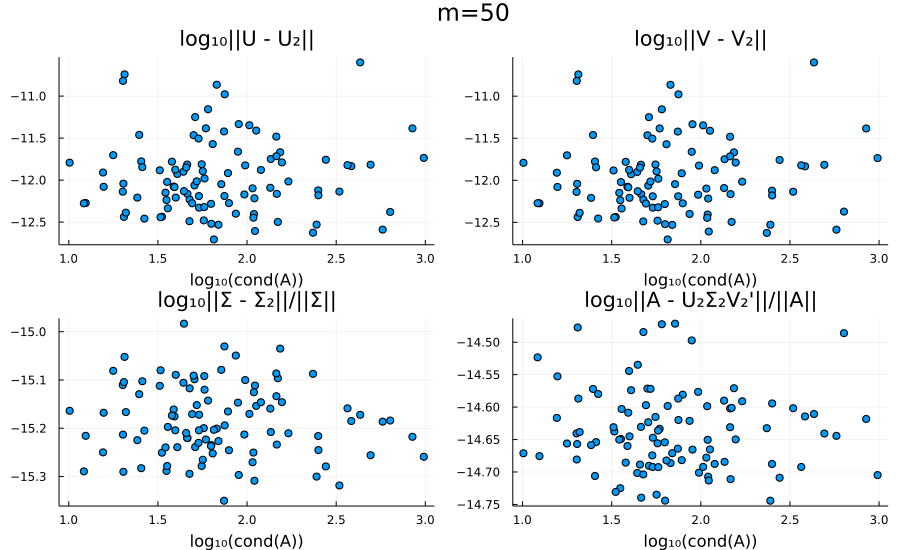

In [4]:
m = 50
n_tests = 100
data = vcat([svd_accuracy_test(m) for i in 1:n_tests]...);
data = log10.(data)
uplot = plot(data[:,5], data[:,1], st=:scatter, xlabel="log₁₀(cond(A))", title="log₁₀||U - U₂||")
vplot = plot(data[:,5], data[:,2], st=:scatter, xlabel="log₁₀(cond(A))", title="log₁₀||V - V₂||")
splot = plot(data[:,5], data[:,3], st=:scatter, xlabel="log₁₀(cond(A))", title="log₁₀||Σ - Σ₂||/||Σ||")
aplot = plot(data[:,5], data[:,4], st=:scatter, xlabel="log₁₀(cond(A))", title="log₁₀||A - U₂Σ₂V₂'||/||A||")
plot(uplot, vplot, splot, aplot, layout=(2,2), plot_title="m=$m")

**(b)** The function `svd_accuracy_test` has a parameter `pow` that is currently ignored.  You should make it so that the randomly generated singular values are raised to the power of `pow` before the matrix `A` is created.  After you make that change, duplicate the scatter plots above, but with `pow=6`.

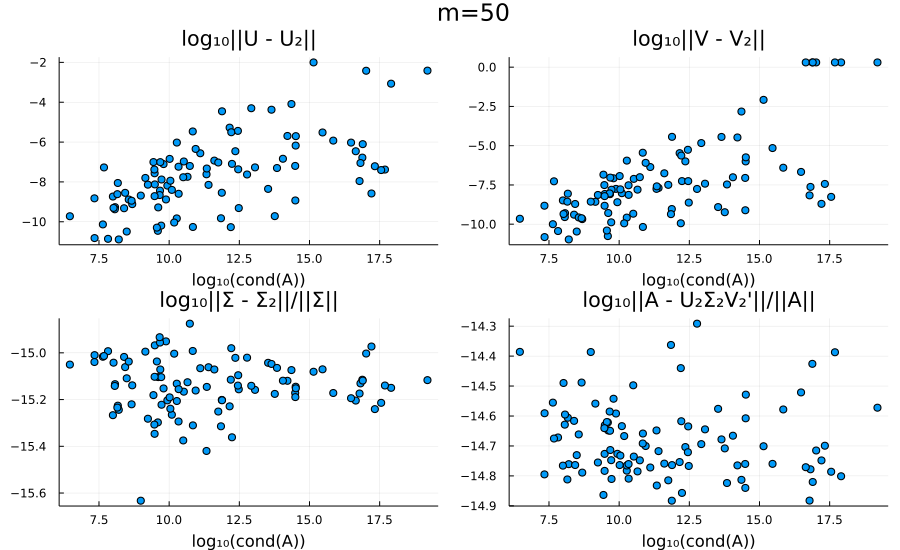

In [5]:
m = 50
n_tests = 100
data = vcat([svd_accuracy_test(m, 6) for i in 1:n_tests]...);
data = log10.(data)
uplot = plot(data[:,5], data[:,1], st=:scatter, xlabel="log₁₀(cond(A))", title="log₁₀||U - U₂||")
vplot = plot(data[:,5], data[:,2], st=:scatter, xlabel="log₁₀(cond(A))", title="log₁₀||V - V₂||")
splot = plot(data[:,5], data[:,3], st=:scatter, xlabel="log₁₀(cond(A))", title="log₁₀||Σ - Σ₂||/||Σ||")
aplot = plot(data[:,5], data[:,4], st=:scatter, xlabel="log₁₀(cond(A))", title="log₁₀||A - U₂Σ₂V₂'||/||A||")
plot(uplot, vplot, splot, aplot, layout=(2,2), plot_title="m=$m")